### Introduction

The project we are going to describe in the following lines, it is related with the market for the auctions of repossesed assets. Data is exposed in a public web from the government
This document is to draft some initial analysis on the dataset for the auctions to get a better understanding on the data we have but also to explain some of the methods we used for data extraction, processiong, etc.

#### Some thoughts

Initially we set our expectations quite high with regards to the amount of new data to be ready to be scraped from the auction site. Turns out we deeply overestimated this.
Initially expectation was set at around 6000-10000 records per week. At the moment we estimate around 800-1200 per week.


In [51]:
# Imports
import json
import pandas as pd
import os
import matplotlib.pyplot as plt

In [27]:
# Constants
ROOT_DIR = os.getcwd()
PATH_TO_CSVS = os.path.join(ROOT_DIR, "results/csv")

The following is an example on how the data looks like.

In this case, it is a JSON file for a single auction item.

In [30]:
path_to_example = os.path.join(ROOT_DIR, "results/details/SUB-AT-2018-18R4586001028.json")

with open(path_to_example) as file:
    jsonData = json.load(file)

print(json.dumps(jsonData, indent=4, sort_keys=True)) 

{
    "autoridad_gestora": {
        "codigo": "R45860",
        "correo_electronico": "subastas.castillalamancha@correo.aeat.es",
        "descripcion": "U.R. SUBASTAS CASTILLA-MANCHA (AEAT)",
        "direccion": "PZ TENDILLAS 1 ; 45002 TOLEDO",
        "fax": "-",
        "telefono": "925287719"
    },
    "bienes": {
        "cargas": "0,00 \u20ac",
        "codigo_postal": "02002",
        "descripcion": "URBANA. GARAJE EN CALLE ANGEL, N\u00ba 19, PLANTA BAJA, SUPERFICIE UTIL, 10,13 M2. CUOTA DE PARTICIPACI\u00d3N DE UN ENTERO Y SEIS CENTESIMAS POR CIENTO.",
        "direccion": "CL ANGEL 19 0",
        "idufir": "02011000745776",
        "inscripcion_registral": "BIEN INSCRITO EN REGISTRO N\u00daM. 4 DE ALBACETE TOMO: 2373 , FOLIO: 191 , LIBRO: 681. FINCA: 36248 , INSCRIPCI\u00d3N: 1",
        "localidad": "ALBACETE",
        "provincia": "Albacete",
        "referencia_catastral": "9961014WJ9196B0019UA",
        "situacion_posesoria": "No consta",
        "titulo_juridico": "PLE

In [12]:
def loading_auction_data(filename, path=PATH_TO_CSVS):
    csv_path = os.path.join(path, filename)
    return pd.read_csv(csv_path)

auctions = loading_auction_data("allAuctions.csv")
auctions.head()

,subId,estimatedValue,debtAmount,independentValuation,province,postalCode,maxBid
0,SUB-AT-2018-18R4586001028,12181.52,NaN,12181.52,albacete,2002.0,9000.0
1,SUB-AT-2018-18R4586001048,4576.13,NaN,4576.13,ciudad_real,13500.0,1000.0
2,SUB-AT-2018-18R4686001043,7353.38,NaN,7353.38,valencia,46701.0,2500.0
3,SUB-AT-2018-18R4686001051,7353.38,NaN,7353.38,valencia,46701.0,3500.0
4,SUB-AT-2019-18R2886001150,7125.00,NaN,7125.00,madrid,28830.0,4000.0


In [31]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8512 entries, 0 to 8511
Data columns (total 7 columns):
subId                   8512 non-null object
estimatedValue          8512 non-null float64
debtAmount              7985 non-null float64
independentValuation    8512 non-null float64
province                8510 non-null object
postalCode              8367 non-null float64
maxBid                  8512 non-null float64
dtypes: float64(5), object(2)
memory usage: 465.6+ KB


In [33]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8512 entries, 0 to 8511
Data columns (total 7 columns):
subId                   8512 non-null object
estimatedValue          8512 non-null float64
debtAmount              7985 non-null float64
independentValuation    8512 non-null float64
province                8510 non-null object
postalCode              8367 non-null float64
maxBid                  8512 non-null float64
dtypes: float64(5), object(2)
memory usage: 465.6+ KB
['__bool__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


In [40]:
percentage_with_debt_amount = round(7985/8512 * 100, 2)

print(f'\nFor the current file, we have {percentage_with_debt_amount}% of samples with the amount of debt provided(claimable by debtor)\n')



For the current file, we have 93.81% of samples with the amount of debt provided(claimable by debtor)



In [50]:
auctions.describe().apply(lambda s: s.apply(lambda x: '%.3f' % x))


,estimatedValue,debtAmount,independentValuation,postalCode,maxBid
count,8512.000,7985.000,8512.000,8367.000,8512.000
mean,315594.369,393721.769,137357.549,24834.215,128362.413
std,2139440.671,5513261.843,2118014.959,14429.506,366445.454
min,0.000,0.000,0.000,1001.000,0.000
25%,62135.765,30000.000,0.000,8921.000,11000.000
50%,153000.000,91257.120,0.000,28024.000,68809.895
75%,271177.065,177478.680,40000.000,38390.000,138223.000
max,180000000.000,366426481.750,180000000.000,52006.000,12737000.000


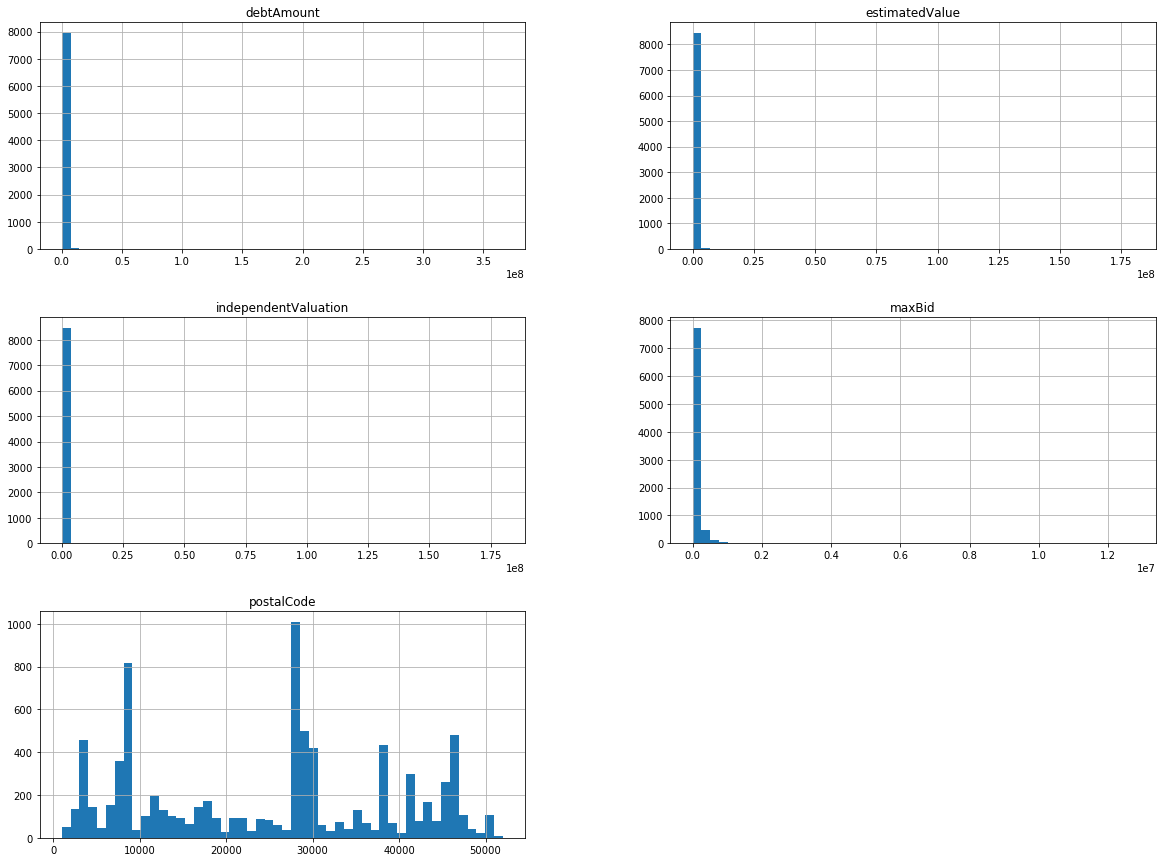

In [54]:
%matplotlib inline

auctions.hist(bins=50, figsize=(20,15))
plt.show()